# Assignment 1 - Data Analytics with Python 
- Student Name: **Vinicius Moura Barros**
- Student Number: **T00244396**

## Configuration & CSV Loading
In the very next cell, you'll be able to configure the path for the CSV file which will be used in this notebook. It is also in this cell that we'll load the dataframe using Pandas. 

**IMPORTANT**: Running the next cell is crucial for the other ones to succeed. This cell loads the Pandas dependency, and also reads the DF from disk into memory.

In [ ]:
import pandas as pd

# Path where the CSV is stored.
CSV_PATH = 'drive/MyDrive/collab-data/SchoolResultsFinal.csv'

# Reading csv with pandas and storing it as DF in variable "df"
# To avoid reading from disk all the time, in this program the "df" will not be overwriten.
# So, please make sure to run this command before running other cells. 
# if needed, each subsequent cell will contain a commented out section to reload the DF from disk.
df = pd.read_csv(CSV_PATH)

## Question 1
### Item (i)
Print out two columns of data. The first column you should print is the name of the 
school and the second is the mean maths grade achieved at that school. Your output 
should specify the school name and the corresponding mean maths grade on the same 
line.

In [ ]:
# df = pd.read_csv(CSV_PATH)
print(df[['School', 'MathMean']]) 

                                               School  MathMean
0      Henry Street School for International Studies        425
1                University Neighborhood High School        419
2                    East Side Community High School        431
3                       SATELLITE ACADEMY FORSYTH ST        370
4            Lower East Side Preparatory High School        532
..                                                ...       ...
362    EBC High School for Public Service - Bushwick        390
363                   BUSHWICK HS FOR SOCIAL JUSTICE        364
364                        Academy of Urban Planning        361
365                    ALL CITY LEADERSHIP SECONDARY        420
366  Bushwick Leaders High School for Academic Excel        345

[367 rows x 2 columns]


### Item (ii)
Calculate the mean number of students from the dataset (based on the 
NumberStudents column).  
 
Next produce two dataframes: (i) The first should contain the details (all columns) of 
all schools that have more than the mean number of students. (ii) The second should 
contain the details of all schools that have less than or equal to the mean number of 
students.  
 
Finally print out the average of the MathMean, ReadingMean and WritingMean for 
each of the two dataframes above

In [ ]:
# df = pd.read_csv(CSV_PATH)

# Calculating Mean
mean_num_students = df['NumberStudents'].mean()
print(f"Mean number of students is {mean_num_students} \n")

# Producing 2 DFs
df_more_than_mean = df[df['NumberStudents'] > mean_num_students]
df_less_or_eq_mean = df[df['NumberStudents'] <= mean_num_students]

# to avoid duplication, of code, I am creating a dict with the DFs to be printed
dfs = {
    'More Students Than Mean': df_more_than_mean, 
    'Less or Equal Students to Mean': df_less_or_eq_mean
}

for item in dfs:
  # Calculating math, reading a writing mean for a given DF
  math_mean = dfs[item]['MathMean'].mean()
  reading_mean = dfs[item]['ReadingMean'].mean()
  writing_mean = dfs[item]['WritingMean'].mean()

  # I wasn't entirely sure whether to print the mean of the means, but I am adding it anyway
  mean_of_means = (math_mean + reading_mean + writing_mean)/3

  print('- ' * 40)
  print(f'For Schools with "{item}" ({len(dfs[item])} schools): ')
  print(f'- Math Mean: {math_mean}')
  print(f'- Reading Mean: {reading_mean}')
  print(f'- Writing Mean: {writing_mean}')
  print(f'- Average of 3 Means: {mean_of_means}')
  print('- ' * 40)



Mean number of students is 103.87465940054496 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
For Schools with "More Students Than Mean" (85 schools): 
- Math Mean: 469.09411764705885
- Reading Mean: 442.9764705882353
- Writing Mean: 438.85714285714283
- Average of 3 Means: 450.30924369747896
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
For Schools with "Less or Equal Students to Mean" (282 schools): 
- Math Mean: 396.8758865248227
- Reading Mean: 393.40070921985813
- Writing Mean: 386.46762589928056
- Average of 3 Means: 392.2480738813205
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


### Item (iii)
The next task is to output the mean writing value for all schools in each district. 
Your code should print out a line for each district with the ID of the district (DBN) 
and the average writing grade achieved by the schools (collectively) in that district.  
 
A sample output is shown.  For example, in the output we can see that schools in 
district 5 have an average writing mean of 420.1428.  
 
Finally, your code should visualize this information using a bar graph (see below). 

Average Writing grade per District:
     WritingMean
DBN             
1     433.125000
2     417.839286
3     422.090909
4     390.375000
5     420.142857
6     372.833333
7     383.714286
8     372.266667
9     382.055556
10    393.461538
11    373.823529
12    361.187500
13    399.642857
14    379.538462
15    373.916667
16    384.666667
17    379.142857
18    399.666667
19    365.250000
20    400.400000
21    378.857143
22    464.200000
23    371.571429
24    403.000000
25    427.333333
26    448.800000
27    384.714286
28    444.250000
29    391.800000
30    452.857143
31    457.222222
32    367.833333


<AxesSubplot:title={'center':'Average Writing grade per District'}, xlabel='DBN'>

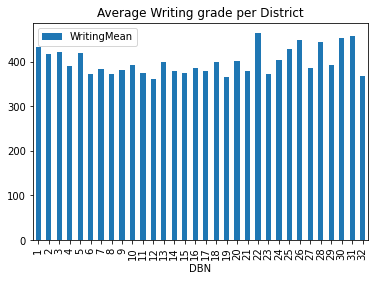

In [ ]:
# df = pd.read_csv(CSV_PATH)

df_by_district = df[['DBN', 'WritingMean']].groupby('DBN').mean()
# Printing DF
print("Average Writing grade per District:")
print(df_by_district)

# Plotting vertical bar chart
df_by_district.plot.bar(title='Average Writing grade per District')

## Question 2
### Item (i)
For the next task we will compare the mean reading, writing and maths values across 
each district. In other words we are interested in seeing if the mean reading, writing 
and maths grades are similar in each district. You should produce a line graph as 
shown below. The x-axis corresponds to each district (numbered 1-32). The y-axis 
correspond to the reading and writing mean score achieved.

Text(0, 0.5, 'Average Value By District')

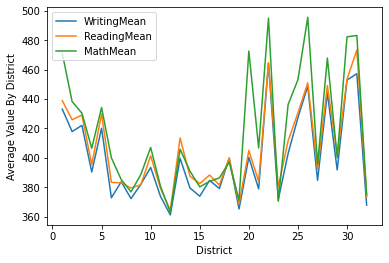

In [ ]:
# df = pd.read_csv(CSV_PATH)

# Creating DF only w/ required data, and calculating the mean groupped by DBN
df_by_district_q2 = df[['DBN', 'WritingMean', 'ReadingMean', 'MathMean']].groupby('DBN').mean()

# plotting chart and setting labels
plt = df_by_district_q2.plot.line()
plt.set_xlabel('District')
plt.set_ylabel('Average Value By District')

### Item (ii)
The objective of this question is to visualize the relationship between the MathMean 
columns and the other two mean columns for reading and writing. Create two 
separate scatter plots. The first should plot the relationship between MathMean and 
ReadingMean. The second scatter plot should plot the relationship between the 
MathMean and WritingMean variables.

<AxesSubplot:xlabel='MathMean', ylabel='WritingMean'>

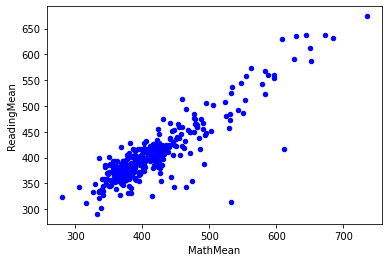

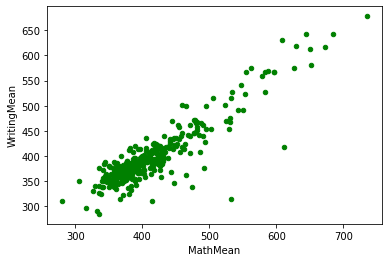

In [ ]:
# df = pd.read_csv(CSV_PATH)

# I wasn't entirely sure if I had to plot from the same DF (df_by_district_q2) used in item (i)
# which was groupped by DBN. But then I decided to plot data from the original DF
# to make sure we have more points to be plotted and therefore taken into consideration in the analysis

# creating new DF
df_q2 = df[['MathMean', 'WritingMean', 'ReadingMean']]

# plotting the charts
df_q2.plot.scatter(x='MathMean', y='ReadingMean', c='blue')
df_q2.plot.scatter(x='MathMean', y='WritingMean', c='green')


## Question 3
### Item (i)
There are a number of missing values in the ‘WritingMean’ column. Determine the 
number of missing values in this column and then replace all missing values in the 
‘WritingMean’ column with the median value of the ‘WritingMean’ column

In [ ]:
# df = pd.read_csv(CSV_PATH)

# creating a copy of DF, so we don't overwrite it
df_q3 = df.copy() 

# counting missing values
df_missing_count = df_q3['WritingMean'].isna().sum()

# calculating median
median = df_q3['WritingMean'].median()

# replacing missing WritingMean values by the median
df_q3['WritingMean'] = df_q3['WritingMean'].fillna(median)

# Printing results
print(f'Number of records without WritingMean is {df_missing_count}. They will be replaced by median: {median}')
print(f"Number of records without WritingMean after change: {df_q3['WritingMean'].isna().sum()}")

Number of records without WritingMean is 5. They will be replaced by median: 383.0
Number of records without WritingMean after change: 0


### Item (ii)
Write code that will allow a user to filter the dataset by specifying an upper and lower 
bound limit for the MathMean column.  
 
The program will ask the user to enter the upper bound and lower bound values for 
the MathMean column. The program should then print out the dataset such that all 
rows printed will have a MathMean value greater than the lower bound and less than 
the upper bound.  
 
Notice in the output below we select an upper bound of 445 and a lower bound of 
440 for the MathMean column. The results contain all rows from the dataset with a 
MathMean value between the two bounds.

In [ ]:
# df = pd.read_csv(CSV_PATH)

def print_limited_dataset_by_boundaries(df):
  """
  This function asks iteratively for 2 user inputs: min and max boundaries for MathMean.
  These values are used to filter the given param Pandas df, and print the filtered data 
  when MathMean > min bound and MathMean < max bound

  :param df: Pandas DF
  """

  # Reading user inputs
  upper_bound = float(input('Inform a number for the MathMean upper bound: '))
  lower_bound = float(input('Inform a number for the MathMean lower bound: '))
  
  # Calculating result and printing it
  result = df[(df['MathMean'] > lower_bound) & (df['MathMean'] < upper_bound)]
  print(result)
  

print_limited_dataset_by_boundaries(df)

Inform a number for the MathMean upper bound: 445
Inform a number for the MathMean lower bound: 440
     DBN                                      School  NumberStudents  \
51     2                             City as School               57   
274   20  YABC at Franklin D. Roosevelt High School               33   
354   31                  PORT RICHMOND HIGH SCHOOL              237   
355   31                         CURTIS HIGH SCHOOL              373   

     ReadingMean  MathMean  WritingMean  
51           468       441        434.0  
274          363       443        369.0  
354          437       442        425.0  
355          439       441        430.0  
